Epoch [1/40], Loss: 0.1248
Epoch [2/40], Loss: 0.0967
Epoch [3/40], Loss: 0.0876
Epoch [4/40], Loss: 0.0845
Epoch [5/40], Loss: 0.0826
Epoch [6/40], Loss: 0.0781
Epoch [7/40], Loss: 0.0769
Epoch [8/40], Loss: 0.0783
Epoch [9/40], Loss: 0.0754
Epoch [10/40], Loss: 0.0751
Epoch [11/40], Loss: 0.0787
Epoch [12/40], Loss: 0.0757
Epoch [13/40], Loss: 0.0757
Epoch [14/40], Loss: 0.0759
Epoch [15/40], Loss: 0.0772
Epoch [16/40], Loss: 0.0742
Epoch [17/40], Loss: 0.0762
Epoch [18/40], Loss: 0.0733
Epoch [19/40], Loss: 0.0771
Epoch [20/40], Loss: 0.0756
Epoch [21/40], Loss: 0.0749
Epoch [22/40], Loss: 0.0759
Epoch [23/40], Loss: 0.0750
Epoch [24/40], Loss: 0.0726
Epoch [25/40], Loss: 0.0752
Epoch [26/40], Loss: 0.0735
Epoch [27/40], Loss: 0.0758
Epoch [28/40], Loss: 0.0746
Epoch [29/40], Loss: 0.0743
Epoch [30/40], Loss: 0.0763
Epoch [31/40], Loss: 0.0746
Epoch [32/40], Loss: 0.0752
Epoch [33/40], Loss: 0.0738
Epoch [34/40], Loss: 0.0739
Epoch [35/40], Loss: 0.0717
Epoch [36/40], Loss: 0.0735
E

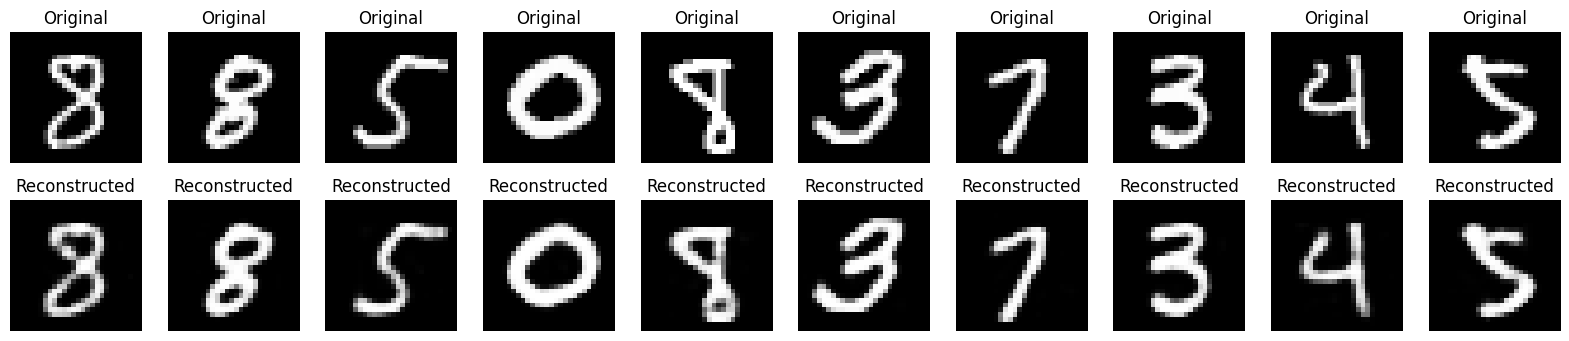

In [2]:

import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128, bias=False),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 28*28, bias=False),
            nn.Sigmoid(),  # Ensuring output is between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Normalizing images
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=250, shuffle=True)

model = Autoencoder()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters())

epochs = 40
for epoch in range(epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        output = model(img)
        # Since the images are normalized to have values between -1 and 1, we adjust the target to match the output range
        target = (img + 1) / 2  # Adjusting the target to be between 0 and 1
        loss = criterion(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Visualization of the results
test_images, _ = next(iter(train_loader))
test_images = test_images.view(test_images.size(0), -1)
test_output = model(test_images)

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(((test_images[i] + 1) / 2).view(28, 28).detach().numpy(), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_output[i].view(28, 28).detach().numpy(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
